# Test for compressor operating in the log domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import comp_giannoulis as comp

In [2]:
save_plots = False

In [3]:
def gen_testsignal(freq, sig_len, sweep_len, sweep_type="env", fs=48e3, plot = False):
    # Time vector
    t = np.linspace(0,sig_len,int(fs)*sig_len)
    
    # Gain sweep vector
    if(sweep_type=="env"):
        # Generates an envelope
        gain_sweep = np.sin(2*np.pi*sweep_len*t)
    else:
        # Generates a ramp
        gain_sweep = np.ones(t.shape)
        gain_sweep[:int(fS*sig_len/(sig_len/sweep_len))] = np.linspace(0,1, int(fS*sig_len/(sig_len/sweep_len)))
    
    #Test signal
    signal = np.sin(2*np.pi*f_sig*t)*gain_sweep
    
    if(plot):
        plt.figure(figsize=(20,10))
        plt.plot(t, signal)
        plt.grid(True, which="both")
        plt.xlabel("t in s")
        plt.ylabel("Amplitude")
        plt.title("Test signal")
    
    return t, signal

In [4]:
# Compressor parameters
fS = 48e3

# Testsignal
#Signal frequency in Hz
f_sig = 10
#Length of the test signal in s
sig_len = 1
# Defines the envelope frequency
sweep_len = 1

In [5]:
t, test_signal = gen_testsignal(freq=f_sig, sig_len=sig_len, sweep_len=sweep_len, sweep_type="env", 
                                fs=fS, plot=False)

### Test attack times

In [6]:
var_attacks = []
# Attack times
t_A = [20e-3, 100e-3, 500e-3]
#Release
t_R = 100e-3
#Threshold
T=-5
#Ratio
R=5
# Knee width
W=0
#Makeup gain
makeup_gain =0

for i in t_A:
    var_attacks.append(comp.log_det(input=test_signal, attack=i, release=t_R, threshold=T, 
                                        ratio=R,  knee_width=W, makeup_gain=makeup_gain))

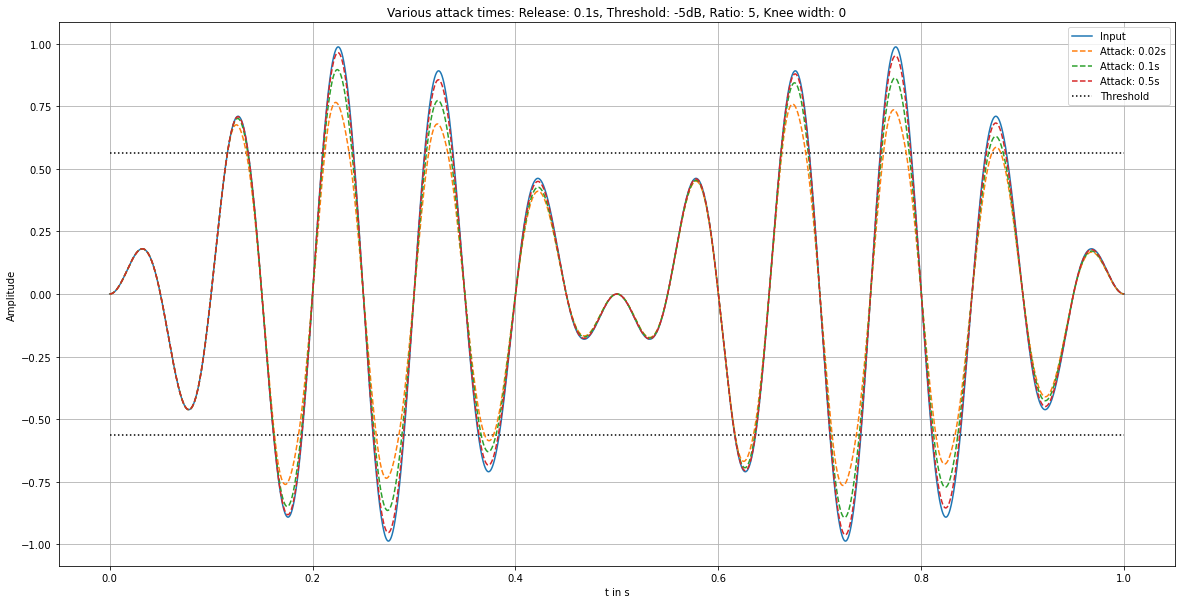

In [7]:
plt.figure(figsize=(20,10))
plt.plot(t, test_signal, label= "Input")
plt.hlines(y=10**(T/20), xmin=t[0], xmax=t[-1], linestyles='dotted', label="Threshold")
plt.hlines(y=-10**(T/20), xmin=t[0], xmax=t[-1], linestyles='dotted')

for i,j in zip(var_attacks, t_A):
    plt.plot(t, i, '--', label="Attack: " + str(j) + "s")

plt.grid(True, which="both")
plt.legend()

plt.xlabel("t in s")
plt.ylabel("Amplitude")
plt.title("Various attack times: Release: " + str(t_R)+"s, Threshold: " + str(T)+
         "dB, Ratio: "+str(R) + ", Knee width: " + str(W))
if(save_plots):
    plt.savefig('plots/log_det_attacks.png')

### Test various release times

In [8]:
var_releases = []
# Attack times
t_A = 20e-3
#Release
t_R = [100e-3, 500e-3, 1]
#Threshold
T=-5
#Ratio
R=5
# Knee width
W=10
#Makeup gain
makeup_gain =0

for i in t_R:
    var_releases.append(comp.log_det(input=test_signal, attack=t_A, release=i, threshold=T, 
                                        ratio=R,  knee_width=W, makeup_gain=makeup_gain))

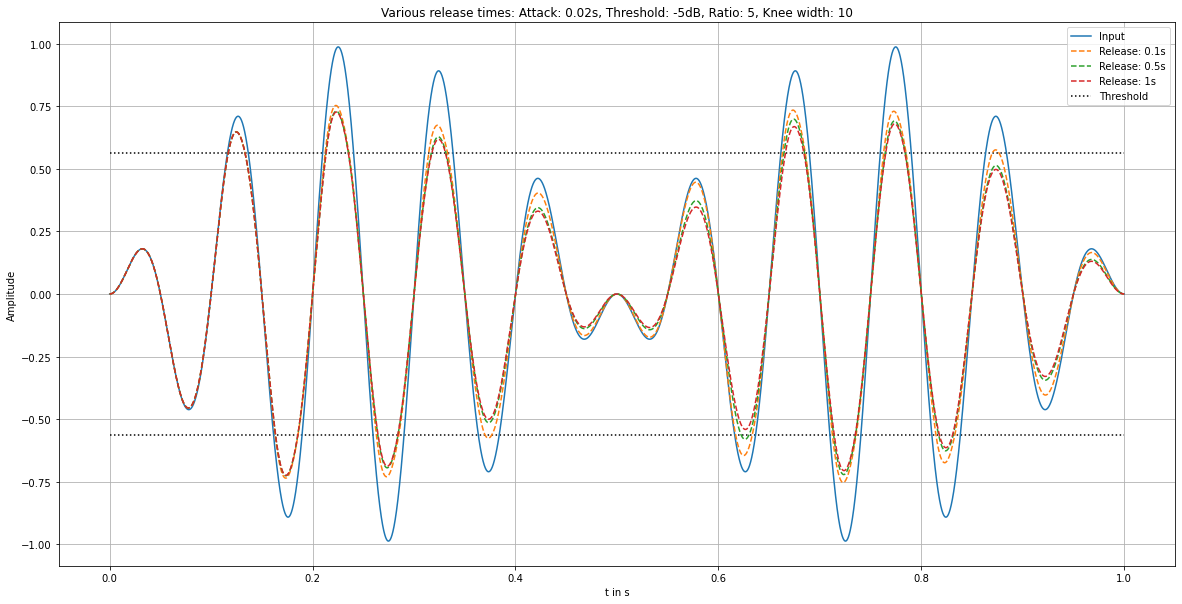

In [9]:
plt.figure(figsize=(20,10))
plt.plot(t, test_signal, label= "Input")
plt.hlines(y=10**(T/20), xmin=t[0], xmax=t[-1], linestyles='dotted', label="Threshold")
plt.hlines(y=-10**(T/20), xmin=t[0], xmax=t[-1], linestyles='dotted')

for i,j in zip(var_releases, t_R):
    plt.plot(t, i, '--', label="Release: " + str(j) + "s")

plt.grid(True, which="both")
plt.legend()

plt.xlabel("t in s")
plt.ylabel("Amplitude")
plt.title("Various release times: Attack: " + str(t_A)+"s, Threshold: " + str(T)+
         "dB, Ratio: "+str(R) + ", Knee width: " + str(W))
if(save_plots):
    plt.savefig('plots/log_det_releases.png')

### Test various thresholds

In [10]:
var_thresholds = []
# Attack times
t_A = 20e-3
#Release
t_R = 100e-3
#Threshold
T = [-20, -10, -5, -3]
#Ratio
R=5
# Knee width
W=10
#Makeup gain
makeup_gain =0

for i in T:
    var_thresholds.append(comp.log_det(input=test_signal, attack=t_A, release=t_R, threshold=i, 
                                        ratio=R,  knee_width=W, makeup_gain=makeup_gain))

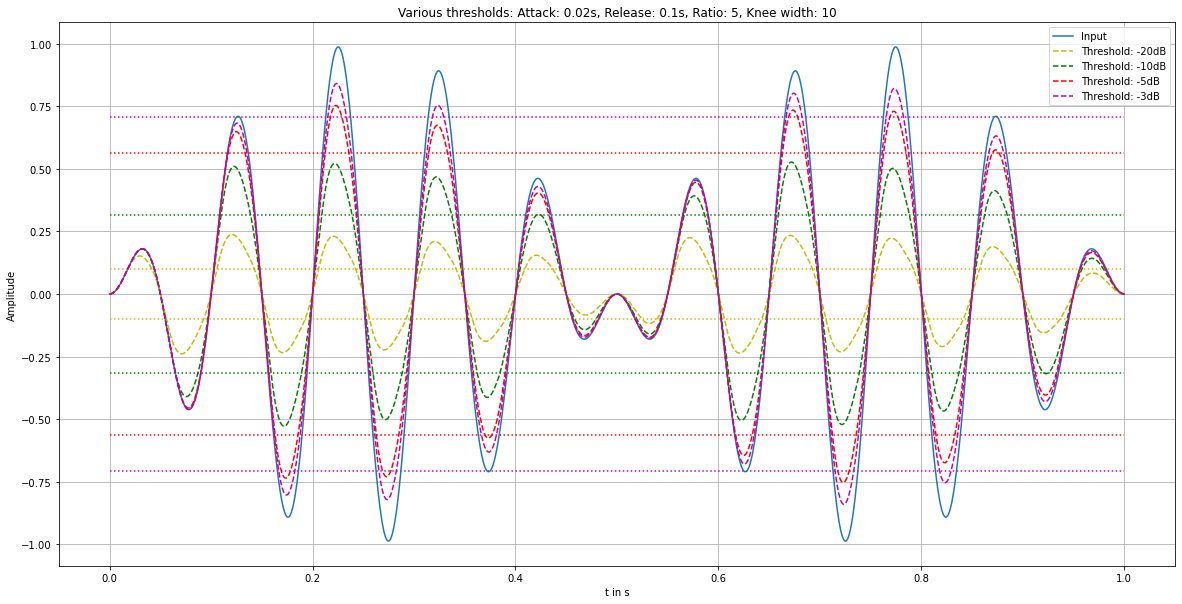

In [11]:
colors = ['y', 'g', 'r', 'm']
plt.figure(figsize=(20,10))
plt.plot(t, test_signal, label= "Input")
k=0

for i,j in zip(var_thresholds, T):
    plt.plot(t, i, '--', color=colors[k], label="Threshold: " + str(j) + "dB")
    plt.hlines(y=10**(j/20), xmin=t[0], xmax=t[-1], colors=colors[k], linestyles='dotted')
    plt.hlines(y=-10**(j/20), xmin=t[0], xmax=t[-1], colors=colors[k], linestyles='dotted')
    k+=1

plt.grid(True, which="both")
plt.legend()

plt.xlabel("t in s")
plt.ylabel("Amplitude")
plt.title("Various thresholds: Attack: " + str(t_A) + "s, Release: " + str(t_R)+"s, Ratio: "+str(R) + ", Knee width: " + str(W))
if(save_plots):
    plt.savefig('plots/log_det_thresholds.png')

### Test various ratios

In [12]:
var_ratios = []
# Attack times
t_A = 20e-3
#Release
t_R = 100e-3
#Threshold
T = -5
#Ratio
R = [1, 3, 8, 1000]
# Knee width
W=10
#Makeup gain
makeup_gain =0

for i in R:
    var_ratios.append(comp.log_det(input=test_signal, attack=t_A, release=t_R, threshold=T, 
                                        ratio=i,  knee_width=W, makeup_gain=makeup_gain))

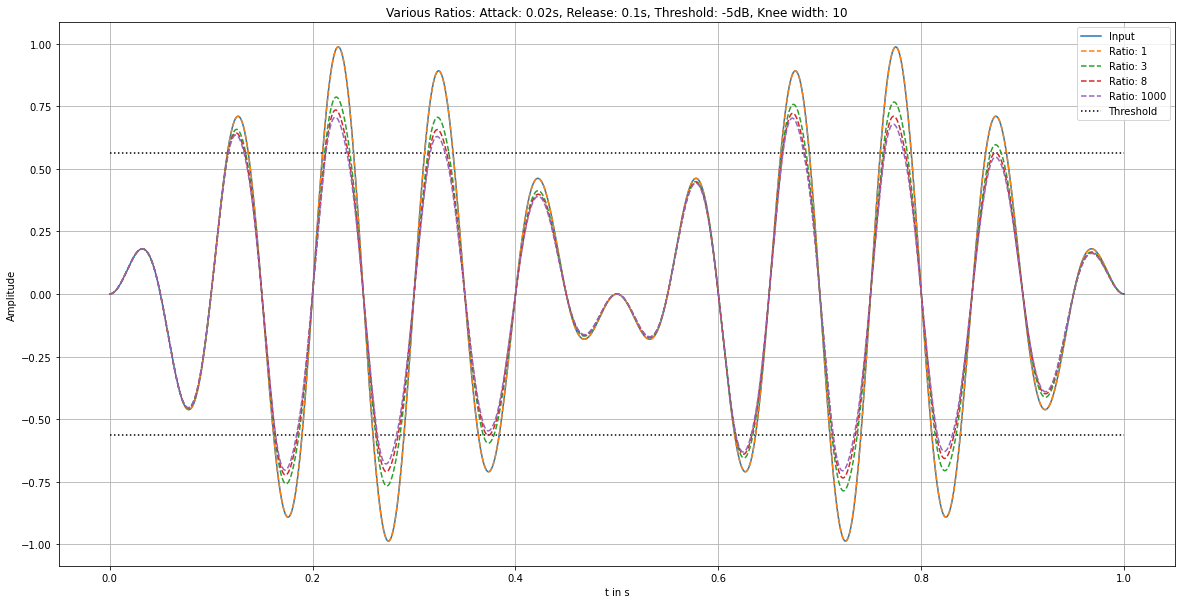

In [13]:
plt.figure(figsize=(20,10))
plt.plot(t, test_signal, label= "Input")
plt.hlines(y=10**(T/20), xmin=t[0], xmax=t[-1], linestyles='dotted', label="Threshold")
plt.hlines(y=-10**(T/20), xmin=t[0], xmax=t[-1], linestyles='dotted')

for i,j in zip(var_ratios, R):
    plt.plot(t, i, '--', label="Ratio: " + str(j))

plt.grid(True, which="both")
plt.legend()

plt.xlabel("t in s")
plt.ylabel("Amplitude")
plt.title("Various Ratios: Attack: " + str(t_A)+ "s, Release: " +str(t_R) + "s, Threshold: " + str(T)+
         "dB, Knee width: " + str(W))
if(save_plots):
    plt.savefig('plots/log_det_ratios.png')

### Test knee widths

In [14]:
var_knee_widths = []
knee_widths = [0, 6, 12, 22]
#Attack
t_A = 20e-3
#Release
t_R = 100e-3
#Threshold
T=-5
#Ratio
R=5
#Makeup gain
makeup_gain =0

for i in knee_widths:
    var_knee_widths.append(comp.log_det(input=test_signal, attack=t_A, release=t_R, threshold=T, 
                                        ratio=R,  knee_width=i, makeup_gain=makeup_gain))

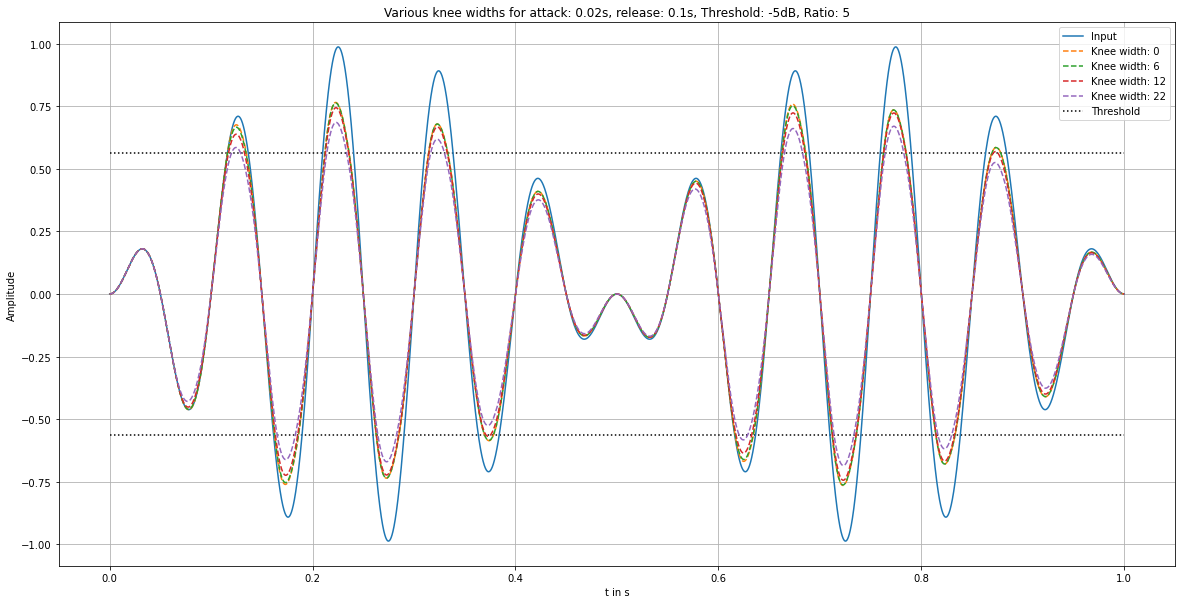

In [15]:
plt.figure(figsize=(20,10))
plt.plot(t, test_signal, label= "Input")
plt.hlines(y=10**(-5/20), xmin=t[0], xmax=t[-1], linestyles='dotted', label="Threshold")
plt.hlines(y=-10**(-5/20), xmin=t[0], xmax=t[-1], linestyles='dotted')

for i,j in zip(var_knee_widths, knee_widths):
    plt.plot(t, i, '--', label="Knee width: " + str(j))

plt.grid(True, which="both")
plt.legend()

plt.xlabel("t in s")
plt.ylabel("Amplitude")
plt.title("Various knee widths for attack: " +str(t_A) + "s, release: " + str(t_R)+"s, Threshold: " + str(T)+
         "dB, Ratio: "+str(R))
if(save_plots):
    plt.savefig('plots/log_det_knee_widths.png')

### Test various makeup gains

In [16]:
var_makeup_gains = []

#Attack
t_A = 20e-3
#Release
t_R = 100e-3
#Threshold
T=-5
#Ratio
R=5
# Knee width
W=10

#Makeup gain
makeup_gain = [0, 6, 12, 22]

for i in makeup_gain:
    var_makeup_gains.append(comp.log_det(input=test_signal, attack=t_A, release=t_R, threshold=T, 
                                        ratio=R,  knee_width=W, makeup_gain=i))

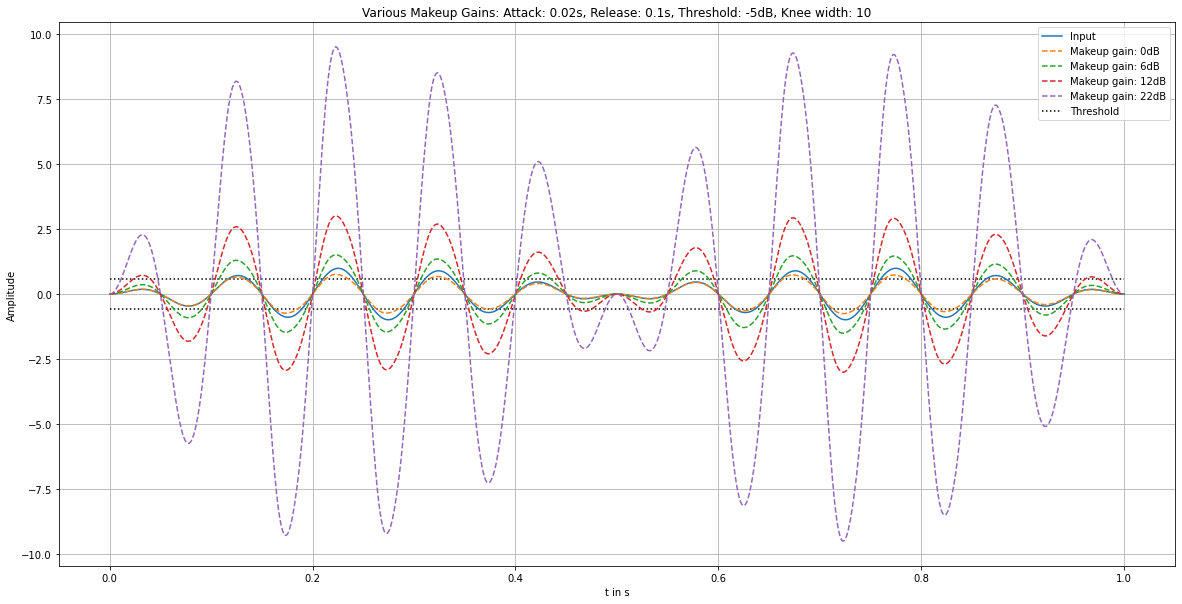

In [17]:
plt.figure(figsize=(20,10))
plt.plot(t, test_signal, label= "Input")
plt.hlines(y=10**(T/20), xmin=t[0], xmax=t[-1], linestyles='dotted', label="Threshold")
plt.hlines(y=-10**(T/20), xmin=t[0], xmax=t[-1], linestyles='dotted')

for i,j in zip(var_makeup_gains, makeup_gain):
    plt.plot(t, i, '--', label="Makeup gain: " + str(j) + "dB")

plt.grid(True, which="both")
plt.legend()

plt.xlabel("t in s")
plt.ylabel("Amplitude")
plt.title("Various Makeup Gains: Attack: " + str(t_A)+ "s, Release: " +str(t_R) + "s, Threshold: " + str(T)+
         "dB, Knee width: " + str(W))
if(save_plots):
    plt.savefig('plots/log_det_makeup_gains.png')